In [33]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Sampling Distribution of a Statistic

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [2]:
united = pd.read_csv('united.csv')
#united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


A random sample:

In [7]:
# Use the df.sample() method.  Note, the default is replace=False
united.sample(6, replace=True)

,Date,Flight Number,Destination,Delay
11792,8/17/15,1727,IND,22
7517,7/21/15,642,SEA,-1
3426,6/23/15,1717,ORD,66
13344,8/28/15,1252,IAH,1
1570,6/11/15,1087,BWI,5
9082,7/31/15,760,JFK,10


## Population Distribution ##

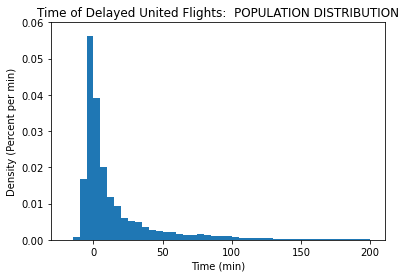

In [11]:
united_bins = np.arange(-20, 201, 5);

plt.hist(united["Delay"], bins=united_bins, density=True);
plt.title("Time of Delayed United Flights:  POPULATION DISTRIBUTION")
plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

## Calculating Population Parameters

In [13]:
## Population Median:
united["Delay"].median()

2.0

In [15]:
## Population  min
min(united['Delay'])

-16

In [17]:
## Population max

max(united['Delay'])

580

In [19]:
# Population mean
np.average(united['Delay'])  

16.658155515370705

In [21]:
# Population std
np.std(united["Delay"])

39.48019985160957

## Sample Distributions ##

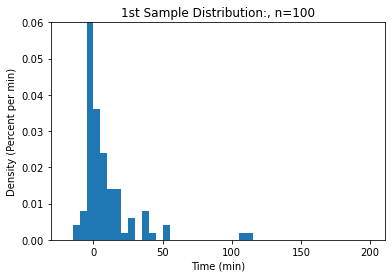

In [23]:
a = united.sample(100, replace=True);

plt.hist(a["Delay"],bins=united_bins, density=True);

plt.title("1st Sample Distribution:, n=100")

plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

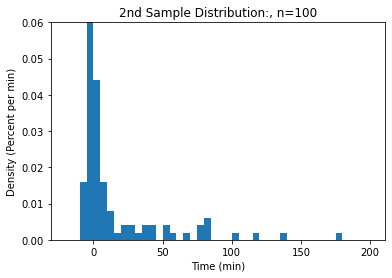

In [26]:
b = united.sample(100, replace=True);

plt.hist(b["Delay"],bins=united_bins, density=True);

plt.title("2nd Sample Distribution:, n=100")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

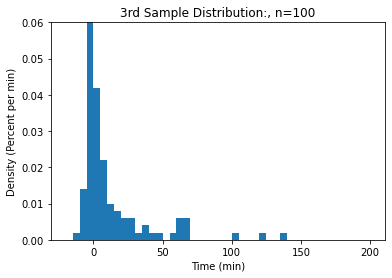

In [28]:
c = united.sample(100, replace=True);

plt.hist(c["Delay"],bins=united_bins, density=True);

plt.title("3rd Sample Distribution:, n=100")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

## Sampling Distribution of Sample Median

In [30]:
# Statistic (median) from 1st sample:
a["Delay"].median()

1.0

In [32]:
b["Delay"].median()

1.0

In [34]:
c["Delay"].median()

2.0

In [36]:
def sample_median(size):
    return np.median(united.sample(size, replace=True)["Delay"])

In [38]:
sample_median(100)

3.0

In [40]:
sample_medians = [ ]

for i in np.arange(100000):
    new_median = sample_median(100)
    sample_medians = np.append(sample_medians, new_median)

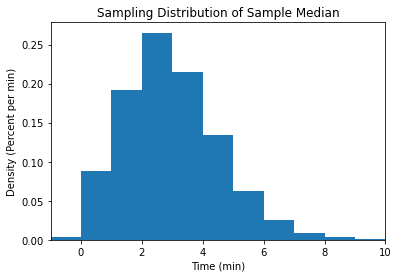

In [42]:
plt.hist(sample_medians,bins = np.arange(-10,31), density=True);
plt.title("Sampling Distribution of Sample Median")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.xlim(-1,10);


### Unbiased Estimator

Recall from the lecture slides:

**Definition:**  An estimator $\hat{\theta}$ is an unbiased estimator of a parameter $\theta$ if $E[\hat{\theta}] = \theta$

**Practice**: Is the sample median of a sample of size 100 an unbiased estimator of the population median?  

Recall, the population median was 2:

In [44]:
united["Delay"].median()

2.0

However, we see in our simulations, the expected value (i.e. mean) of the distribution of sample medians of a sample of size 100 is not 2:

In [46]:
sample_medians.mean()

2.60339

Since these are not equal the sample median is **NOT an unbiased estimator of the population median (it is biased)**

### Standard Error

Recall from the slides:

Definition:  The standard error of a statistic is the standard deviation of the sampling distribution of that statistic.

**Practice**:  Estimate the standard error of the sample median of a sample of size 100 using your simulation above.  

In [60]:
std_error = sample_medians.std()
std_error

1.581094718193695

## Sampling Distribution of Sample Mean

Let's repeat the same process as above, however this time with the sample mean:

In [67]:
def sample_mean(size):
    return np.mean(united.sample(size, replace=True)["Delay"])

In [69]:
sample_means= [ ]

for i in np.arange(100000):
    new_mean = sample_mean(100)
    sample_means = np.append(sample_means, new_mean)

KeyboardInterrupt: 

In [ ]:
plt.hist(sample_means,bins = np.arange(-10,31), density=True);
plt.title("Sampling Distribution of Sample Mean")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.xlim(-1,31);


**Practice**: Is the sample mean of a sample of size 100 an unbiased estimator of the population mean?  (Use your simulations to estimate the sample mean of the sampling distribution - note that this will just be an estimate since we are using simulations).   

Recall, the population mean was:

In [ ]:
np.average(united['Delay'])  

The sample mean of the sampling distribution of a sample of size 100 is:


In [ ]:
sample_means.mean()

Note, that we proved in the slides that these are equal (so any difference we see above is due to the fact that we're simulating the sampling distribution, so it's not perfect)

### Sample Distribution of Sample Proportions:



Suppose the population is a bernoulli distribution with p = 0.7

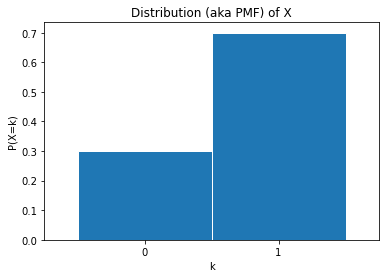

In [83]:
x=[0,1]

x_pmf = pd.Series([0.3, 0.7], index=x)


x_pmf.plot.bar(rot=0,width=1, ec='white')

#Always include a title
plt.title("Distribution (aka PMF) of X");

#Label what the x and y axes represent:
plt.ylabel("P(X=k)");
plt.xlabel("k");


In [99]:
#Simulate sample of size 100 from this distribution:
sample = np.random.choice([0,1],p=[0.3, 0.7], size = 100)



(array([0.41, 0.59]),
 array([-0.5,  0.5,  1.5]),
 <BarContainer object of 2 artists>)

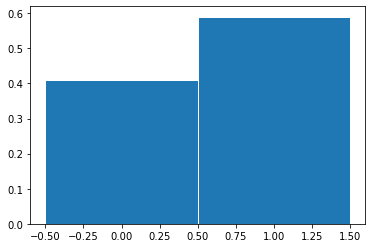

In [140]:
plt.hist(sample,width=1, ec='white' , density =True, bins=[-.5,.5,1.5])

In [116]:
# Calculate the sample proportion:
np.mean(sample)

0.59

(array([0.29, 0.71]),
 array([-0.5,  0.5,  1.5]),
 <BarContainer object of 2 artists>)

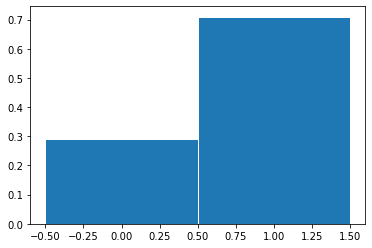

In [118]:
# Repeat!

sample2 = np.random.choice([0,1],p=[0.3, 0.7], size = 100)
plt.hist(sample2,width=1, ec='white' , density =True, bins=np.arange(-.5, 2.5))



In [120]:
np.mean(sample2)

0.71

(array([0.36, 0.64]),
 array([-0.5,  0.5,  1.5]),
 <BarContainer object of 2 artists>)

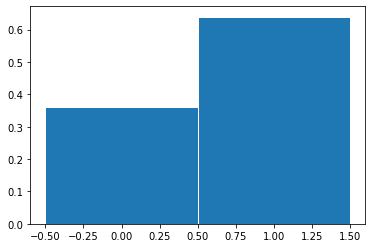

In [142]:
sample3 = np.random.choice([0,1],p=[0.3, 0.7], size = 100)
plt.hist(sample3,width=1, ec='white' , density =True, bins=np.arange(-.5, 2.5))



In [144]:
np.mean(sample3)

0.64

In [172]:
sample_means = np.array([np.mean(np.random.choice([0,1],p=[0.3, 0.7], size = 1000)) for i in range(10000)])
    

Text(0.5, 1.0, 'Sampling Distribution of Sample Means')

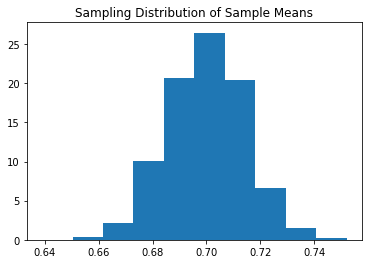

In [178]:
plt.hist(sample_means,density=True);
plt.title("Sampling Distribution of Sample Means")
